# Titanic Survival Prediction

This project aims to build a predictive model to determine whether a passenger on the Titanic survived or not. The Titanic dataset is a classic dataset used in data science and machine learning, containing various details about the passengers such as age, gender, ticket class, fare, and whether or not they survived.

## Objective
The objective of this project is to:
1. Load and explore the Titanic dataset.
2. Preprocess the data by handling missing values and encoding categorical variables.
3. Select relevant features and split the data into training and testing sets.
4. Train a machine learning model to predict the survival of passengers.
5. Evaluate the model's performance using appropriate metrics.
6. Analyze feature importances to understand which features contribute most to the predictions.

We will use Python and popular data science libraries such as pandas, numpy, scikit-learn, seaborn, and matplotlib to accomplish these tasks. The model we will use for prediction is the Random Forest classifier, a powerful and widely-used ensemble learning method.

Let's get started!


### Step 1: Import Libraries


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore')
sns.set_theme(style="darkgrid",palette=sns.color_palette("muted"))

### Step 2: Load and Explore the Dataset


In [3]:
df= pd.read_csv('Titanic-Dataset.csv',encoding='latin-1')
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check for  duplicates in dataset

In [5]:
# Check for duplicates in the entire dataset
duplicate_rows = df[df.duplicated()]

# Display any duplicate rows found
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)

# Confirm the new shape of the DataFrame after dropping duplicates
print("Shape of DataFrame after removing duplicates:", df.shape)

No duplicate rows found.
Shape of DataFrame after removing duplicates: (891, 12)


#### Check for missing values

In [6]:
# Check for missing values in DataFrame 'df'
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Step 3: Data cleaning & Feature engineering

#### Handle Missing values

In [7]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Handle duplicates if present
df.drop_duplicates(inplace=True)

#### Feature Engineering

In [8]:
# Feature Engineering: Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Grouping Age into Categories
bins = [0, 18, 35, 60, np.inf]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert data types if needed
df['Age'] = df['Age'].astype(int)

# Feature engineering example: creating 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Print summary after handling missing values and feature engineering
print("Summary after handling missing values and feature engineering:")
print(df.info())

# Check column names before dropping
print("Columns before dropping:")
print(df.columns)

# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns = df.columns.tolist()  # Get existing columns in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]  # Filter existing columns
df.drop(columns=columns_to_drop, inplace=True)

# Print summary after dropping columns
print("Summary after dropping columns:")
print(df.columns)

Summary after handling missing values and feature engineering:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Title        891 non-null    object  
 13  AgeCategory  891 non-null    category
 14  FamilySize   891 non-null    int64   
dtypes: category(1), float64(1), int32(1), int64(6), object(6)
memory usage: 102.0+ KB
None
Columns b

### Step 4: Exploratory Data Analysis (EDA):

##### Univariate Analysis

In [9]:
# Compute summary statistics
print("Summary statistics:")
print(df.describe())


Summary statistics:
         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.345679    0.523008    0.381594   32.204208   
std      0.486592    0.836071   13.028212    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       FamilySize  
count  891.000000  
mean     1.904602  
std      1.613459  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max     11.000000  


In [10]:
# Check unique values and value counts
print("\nUnique values and value counts:")
for column in df.columns:
    print(f"Column: {column}")
    if df[column].dtype == 'object':  # Check for categorical columns
        print(df[column].value_counts())
    else:  # Check for numerical columns
        print(df[column].value_counts().sort_index())



Unique values and value counts:
Column: Survived
0    549
1    342
Name: Survived, dtype: int64
Column: Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
Column: Sex
male      577
female    314
Name: Sex, dtype: int64
Column: Age
0      7
1      7
2     10
3      6
4     10
      ..
66     1
70     3
71     2
74     1
80     1
Name: Age, Length: 71, dtype: int64
Column: SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Column: Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
Column: Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64
Column: Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64
Column: Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Ma

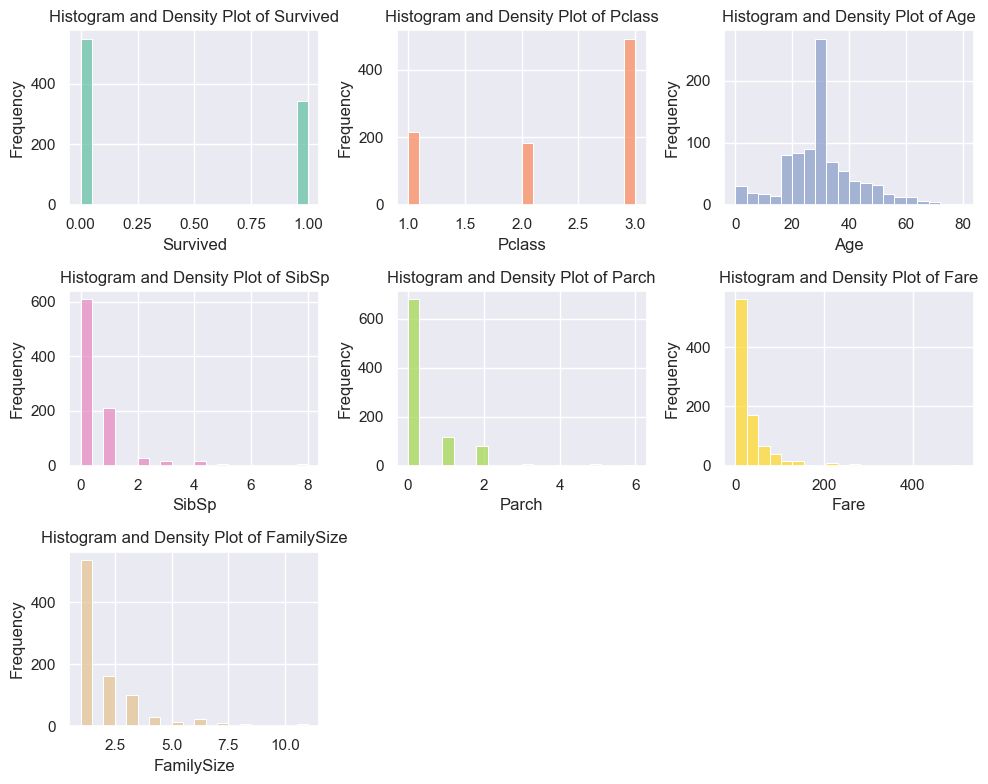

In [11]:
# Define the colors from the Pastel1 palette
colors = sns.color_palette('Set2')

# Create histograms with density plots for numerical data
plt.figure(figsize=(10, 8))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=False, color=colors[i])
    plt.title(f'Histogram and Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


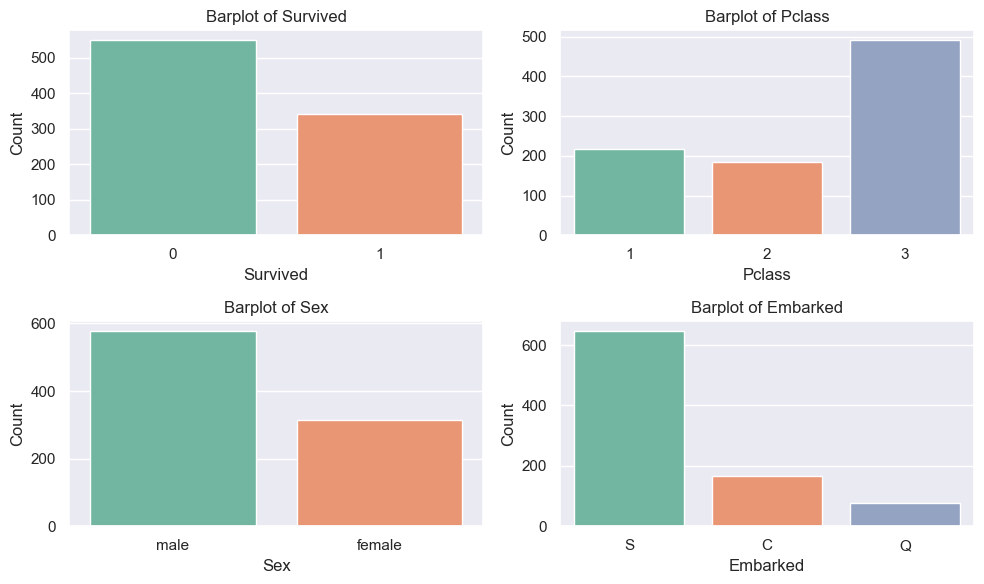

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors from the Set2 palette
colors = sns.color_palette('Set2')

# Create bar plots for categorical data
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Survived', 'Pclass', 'Sex', 'Embarked'], start=1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Barplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


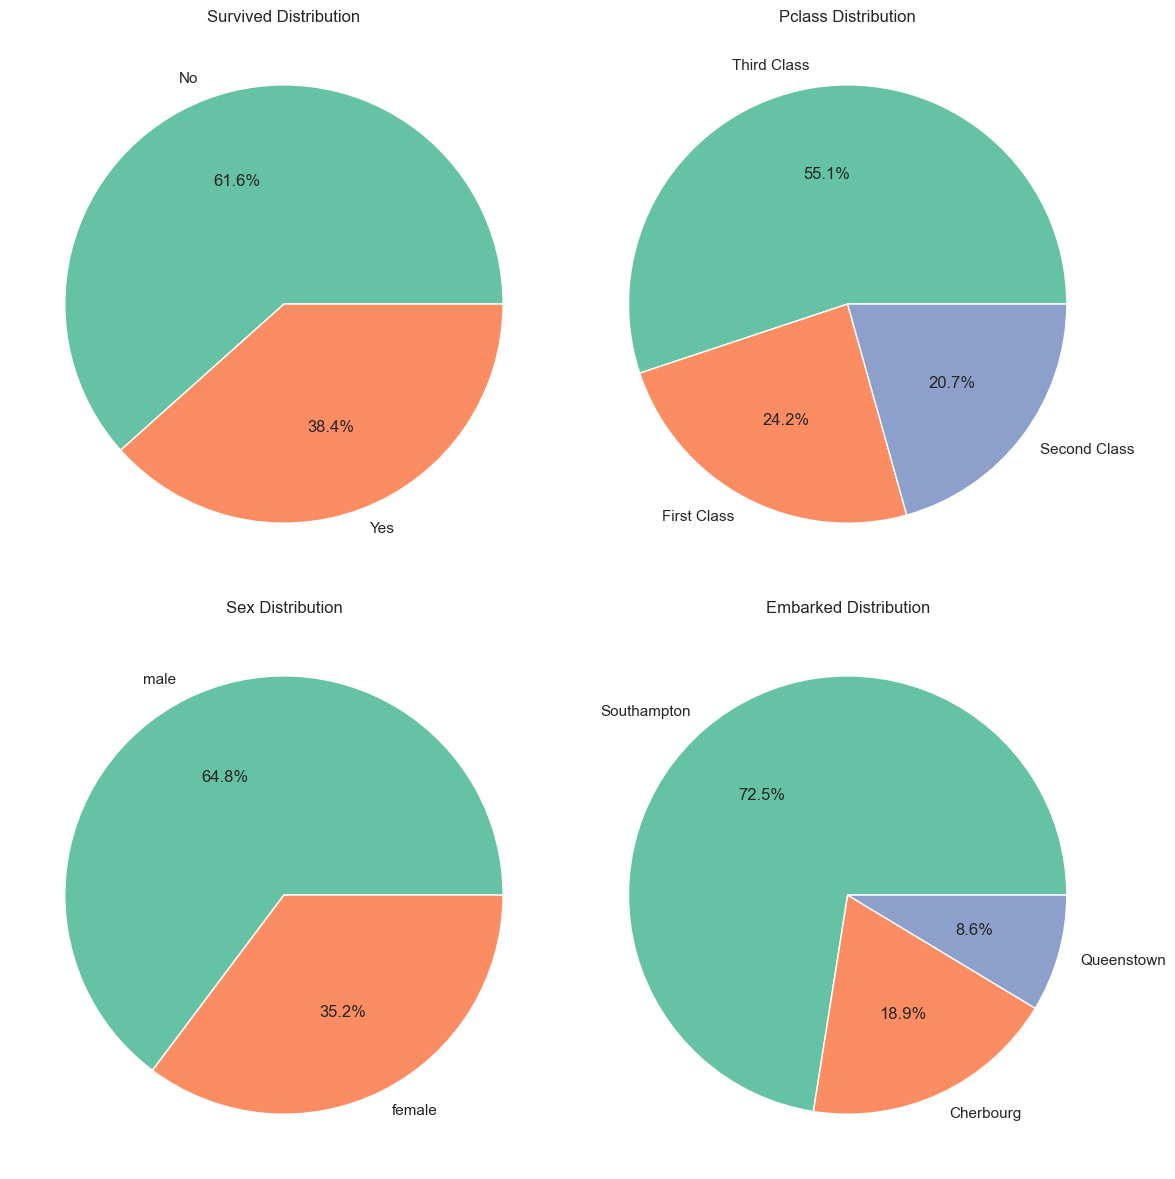

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 1 with 'Yes' and 0 with 'No' for Survived column
df['Survived'].replace({1: 'Yes', 0: 'No'}, inplace=True)

# Replace numerical values in Pclass column with descriptive labels
df['Pclass'].replace({1: 'First Class', 2: 'Second Class', 3: 'Third Class'}, inplace=True)

# Replace numerical values in Embarked column with descriptive labels
df['Embarked'].replace({'S': 'Southampton', 'Q': 'Queenstown', 'C': 'Cherbourg'}, inplace=True)


# Set the color palette
colors = plt.cm.Set2.colors

# Create subplots for pie charts
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot pie charts for each categorical column
for ax, col, color in zip(axes.flatten(), ['Survived', 'Pclass', 'Sex', 'Embarked'], colors):
    counts = df[col].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors[:len(counts)])
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


- 61.6% of passengers didn't survive.
- There are more males than females, which could be attributed to the crew composition.
- 72.5% of passengers departed from Southampton.
- 55.1% of passengers are from third class (Pclass 3).

##### Multivariate Analysis

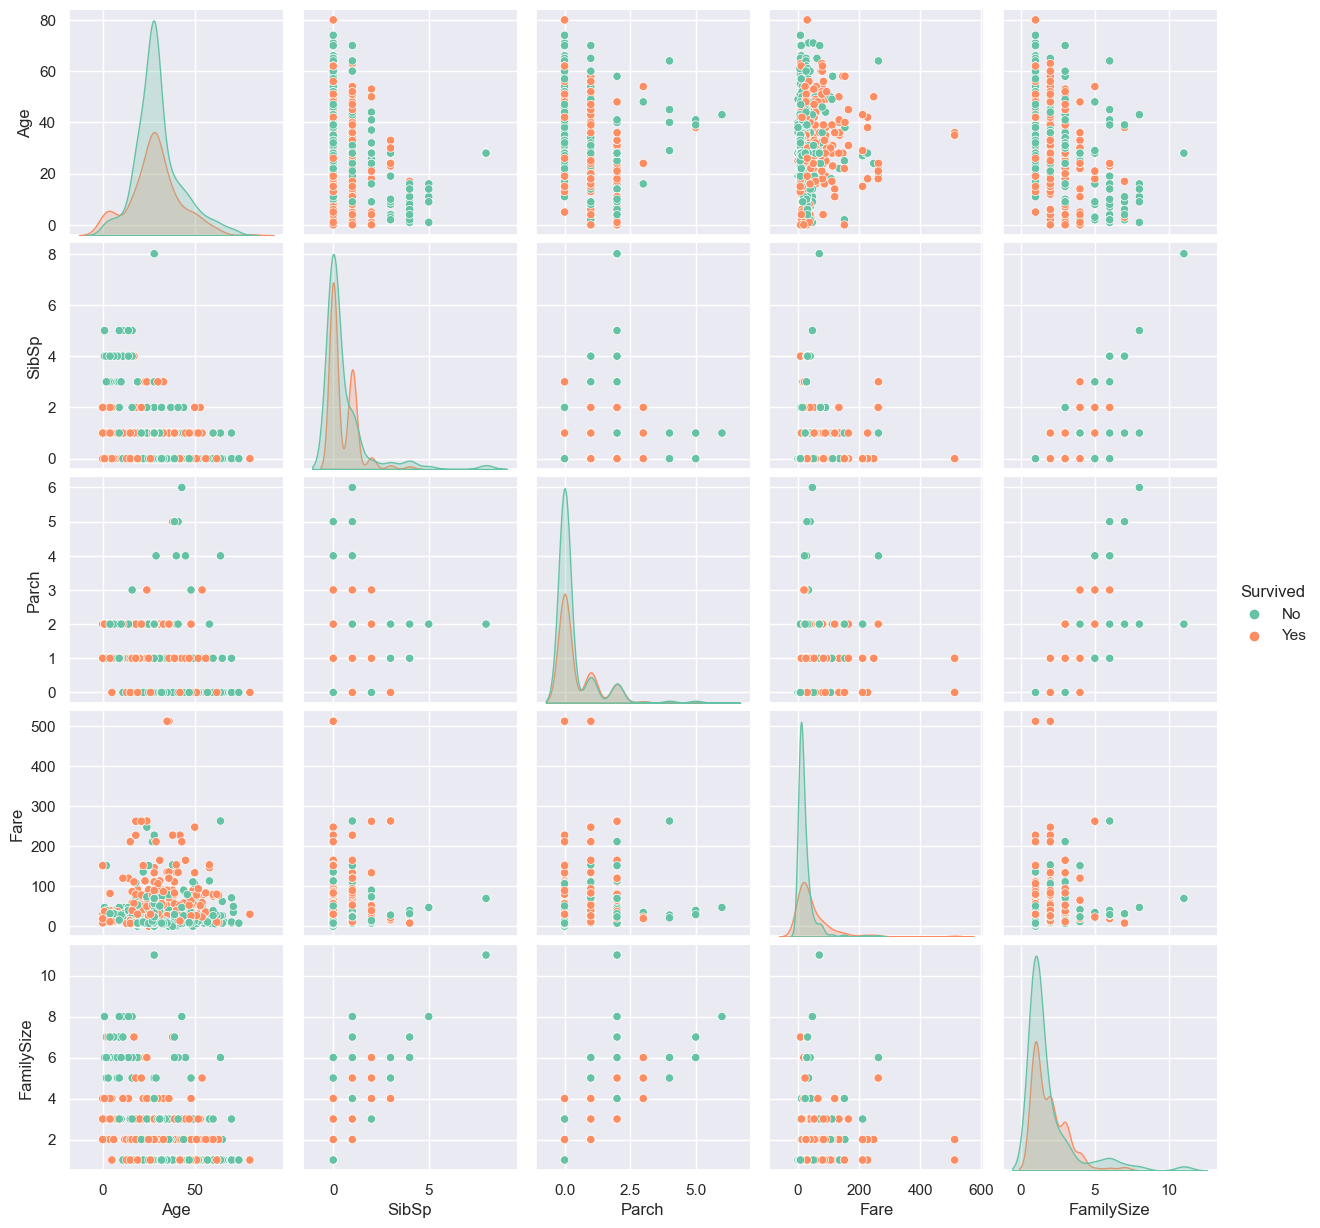

In [14]:
# Pair plots for numerical data
sns.pairplot(df, hue='Survived', palette='Set2')
plt.show()


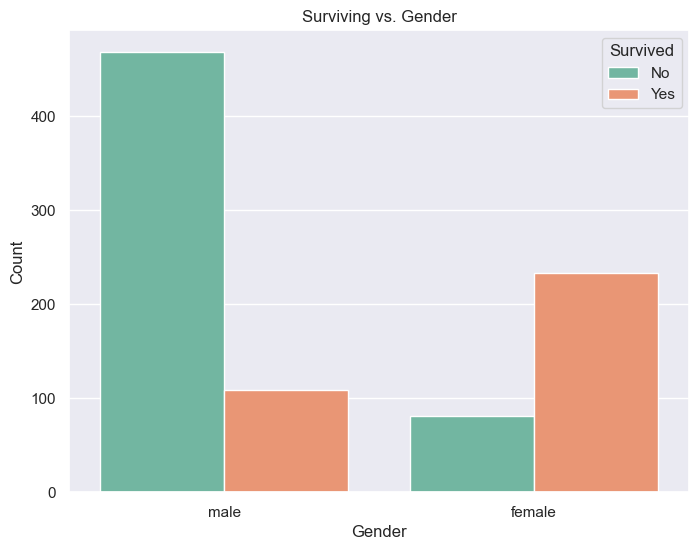

In [15]:
# Surviving vs. Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Surviving vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

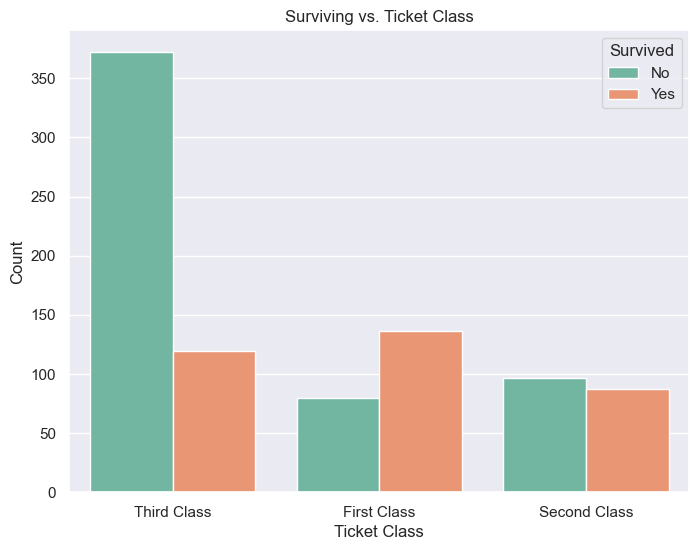

In [16]:
# Surviving vs. Ticket Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Surviving vs. Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

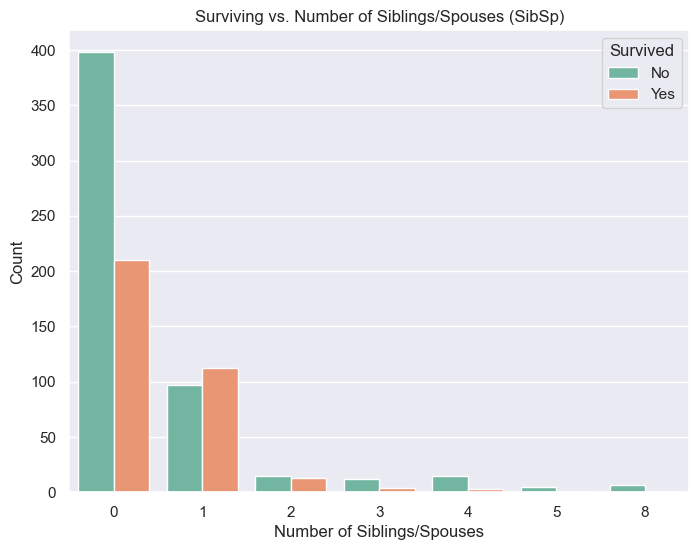

In [17]:
# Surviving vs. Number of Siblings/Spouses (SibSp)
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='Set2')
plt.title('Surviving vs. Number of Siblings/Spouses (SibSp)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

### Step 5: Data Preprocessing

In [18]:
def one_hot_encoding(data=None):
    dums = pd.get_dummies(data[["Sex", "Embarked"]], dtype=int)
    dums_data = pd.concat([dums, data], axis=1).drop(columns=['Sex', 'Embarked']).reset_index(drop=True)
    return dums_data

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select categorical and numerical columns
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'Fare', 'FamilySize', 'SibSp', 'Parch']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X = df.drop('Survived', axis=1)
y = df['Survived']

X_preprocessed = preprocessor.fit_transform(X)


In [20]:
model= one_hot_encoding(df)

In [21]:
model

,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Survived,Pclass,Age,SibSp,Parch,Fare,Title,AgeCategory,FamilySize
0,0,1,0,0,1,No,Third Class,22,1,0,7.2500,Mr,Young Adult,2
1,1,0,1,0,0,Yes,First Class,38,1,0,71.2833,Mrs,Adult,2
2,1,0,0,0,1,Yes,Third Class,26,0,0,7.9250,Miss,Young Adult,1
3,1,0,0,0,1,Yes,First Class,35,1,0,53.1000,Mrs,Adult,2
4,0,1,0,0,1,No,Third Class,35,0,0,8.0500,Mr,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,No,Second Class,27,0,0,13.0000,Rev,Young Adult,1
887,1,0,0,0,1,Yes,First Class,19,0,0,30.0000,Miss,Young Adult,1
888,1,0,0,0,1,No,Third Class,28,1,2,23.4500,Miss,Young Adult,4
889,0,1,1,0,0,Yes,First Class,26,0,0,30.0000,Mr,Young Adult,1


### Step 6: Heat Map

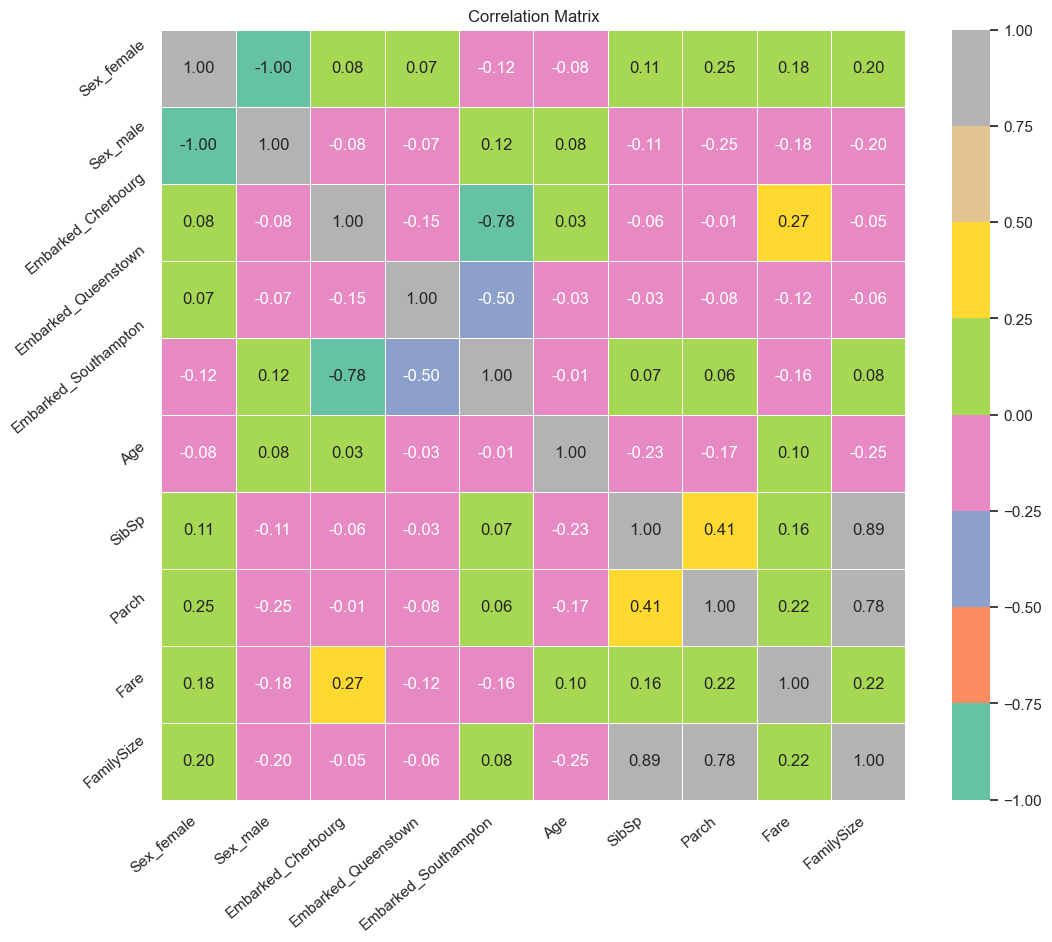

In [22]:
# Assuming df is your original DataFrame
# Replace 1 with 'Yes' and 0 with 'No' for Survived column
df['Survived'].replace({1: 'Yes', 0: 'No'}, inplace=True)

# Replace numerical values in Pclass column with descriptive labels
df['Pclass'].replace({1: 'First Class', 2: 'Second Class', 3: 'Third Class'}, inplace=True)

# Replace numerical values in Embarked column with descriptive labels
df['Embarked'].replace({'S': 'Southampton', 'Q': 'Queenstown', 'C': 'Cherbourg'}, inplace=True)

# Perform one-hot encoding
df_encoded = one_hot_encoding(data=df)

# Set the color palette for the heatmap
cmap = sns.color_palette("Set2", as_cmap=True)

# Explore correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
# Rotate x-axis labels to horizontal
plt.xticks(rotation=40, ha='right')

# Ensure y-axis labels are vertical
plt.yticks(rotation=40)
plt.show()

### Step 7: Spliting data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


### Step 8: Train the model

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=80, random_state=42)

### Step 9: Evaluate the Model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[88 17]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.84      0.85       105
         Yes       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



### Step 10: Predict on New Data

In [26]:
new_data = pd.DataFrame({
    'Pclass': ['First Class'],
    'Sex': ['female'],
    'Age': [52],
    'SibSp': [3],
    'Parch': [0],
    'Fare': [80],
    'Embarked': ['Queenstown'],
    'FamilySize': [3]
})

new_data_preprocessed = preprocessor.transform(new_data)
prediction = model.predict(new_data_preprocessed)
print('Prediction:', prediction)


Prediction: ['Yes']


### Step 11: Save the Model

In [27]:
pip install joblib



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import joblib

# Assuming you have your trained model in a variable called 'model'
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [29]:
import joblib

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']